# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [4]:
city

'margaret river'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 115.0667, 'lat': -33.95},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 294.67,
  'feels_like': 294.37,
  'temp_min': 294.67,
  'temp_max': 294.67,
  'pressure': 1020,
  'humidity': 57,
  'sea_level': 1020,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 6.32, 'deg': 136, 'gust': 9.69},
 'clouds': {'all': 8},
 'dt': 1712454649,
 'sys': {'country': 'AU', 'sunrise': 1712442973, 'sunset': 1712484424},
 'timezone': 28800,
 'id': 2066981,
 'name': 'Margaret River',
 'cod': 200}

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | melekeok village
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | labytnangi
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | labrador city
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | puerto el triunfo
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | bamboo flat
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | sabha
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | qaqortoq
Processin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,280.20,65,0,3.09,US,1712454404
1,hamilton,39.1834,-84.5333,283.62,63,0,2.57,US,1712454389
2,college,64.8569,-147.8028,277.64,42,75,0.00,US,1712454573
3,melekeok village,7.4957,134.6367,303.46,70,75,5.14,PW,1712454722
4,grytviken,-54.2811,-36.5092,277.12,95,100,5.62,GS,1712454568


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,280.20,65,0,3.09,US,1712454404
1,hamilton,39.1834,-84.5333,283.62,63,0,2.57,US,1712454389
2,college,64.8569,-147.8028,277.64,42,75,0.00,US,1712454573
3,melekeok village,7.4957,134.6367,303.46,70,75,5.14,PW,1712454722
4,grytviken,-54.2811,-36.5092,277.12,95,100,5.62,GS,1712454568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

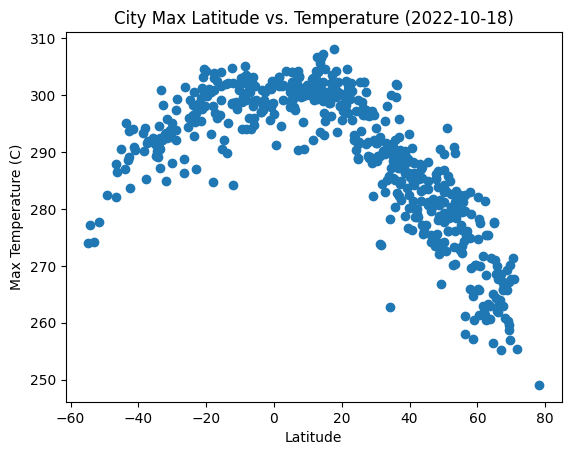

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

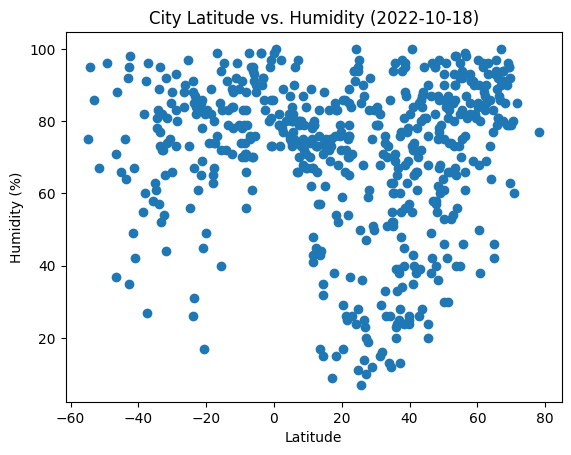

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

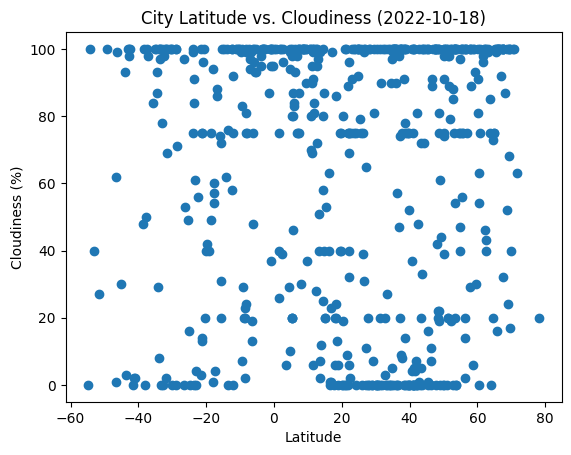

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

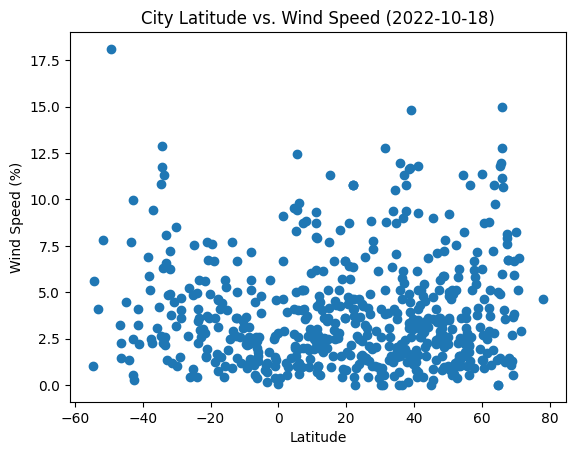

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# HELP
# Define a function to create Linear Regression plots
pearsonr = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)

In [39]:
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [40]:
# y = (theta*x) + intercept

In [61]:
def plot_lr(x_values,y_values, text_coordinates):
    (slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y ="+str(round(slope,2)) + " x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize = 15, color="red")
    print(f"The r-value is: {rvalue **2}")
    plt.show()
    

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,280.20,65,0,3.09,US,1712454404
1,hamilton,39.1834,-84.5333,283.62,63,0,2.57,US,1712454389
2,college,64.8569,-147.8028,277.64,42,75,0.00,US,1712454573
3,melekeok village,7.4957,134.6367,303.46,70,75,5.14,PW,1712454722
5,labytnangi,66.6572,66.4183,263.92,86,100,4.04,RU,1712454722


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,277.12,95,100,5.62,GS,1712454568
6,waitangi,-43.9535,-176.5597,286.94,75,93,1.34,NZ,1712454568
10,port elizabeth,-33.9180,25.5701,290.98,89,100,2.24,ZA,1712454588
16,puerto ayora,-0.7393,-90.3518,298.46,97,95,1.34,EC,1712454575
19,port-aux-francais,-49.3500,70.2167,282.39,96,100,18.12,TF,1712454569


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8028838334610139


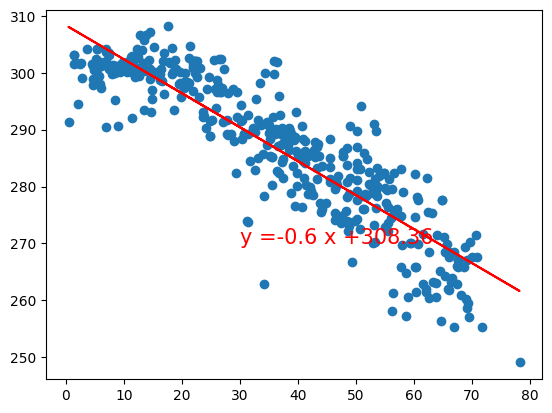

In [71]:
plot_lr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],text_coordinates=(30,270))

the r-value: 0.3567889843387892


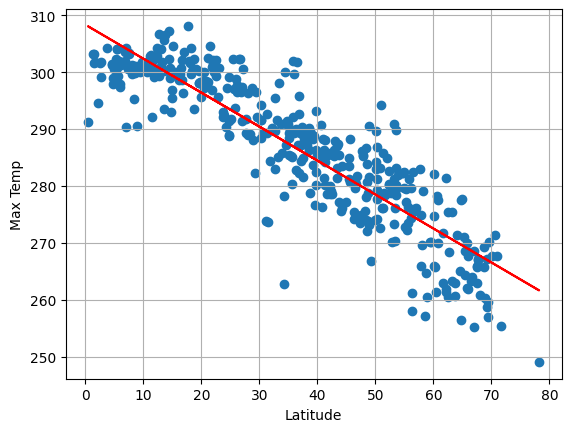

In [74]:
# Linear regression on Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f"the r-value: {model[0] ** 2}")
plt.grid()
plt.show();

#how do I show the r-value?
#How do I put the formula on it?

The r-value is: 0.5178235890861798


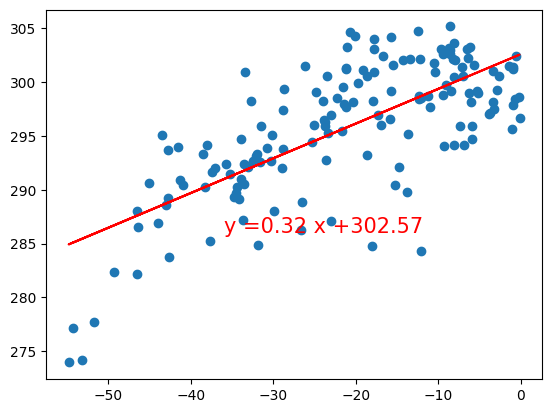

In [69]:
plot_lr( southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], text_coordinates=(-36,286))

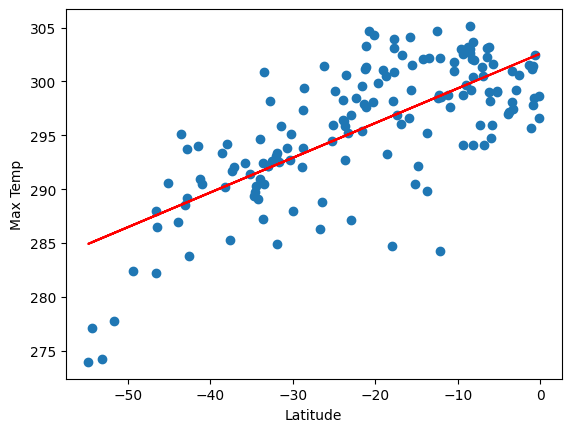

In [30]:
# Linear regression on Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show();

#how do I show the r-value?
#How do I put the formula on it?

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

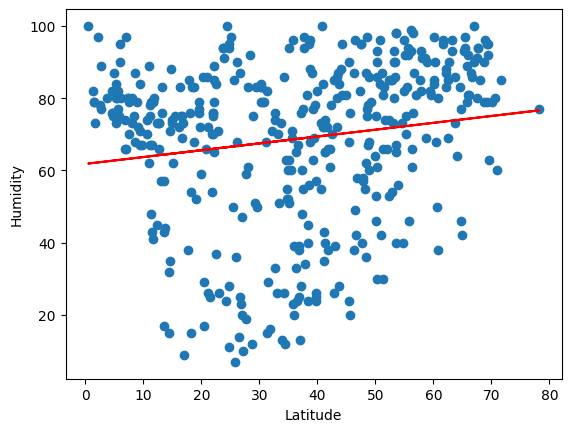

In [33]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show();

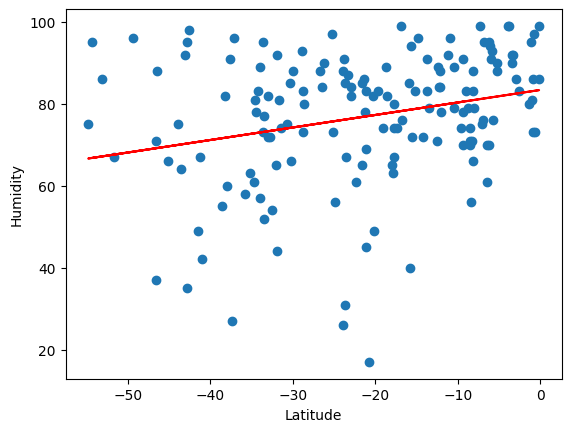

In [34]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show();

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

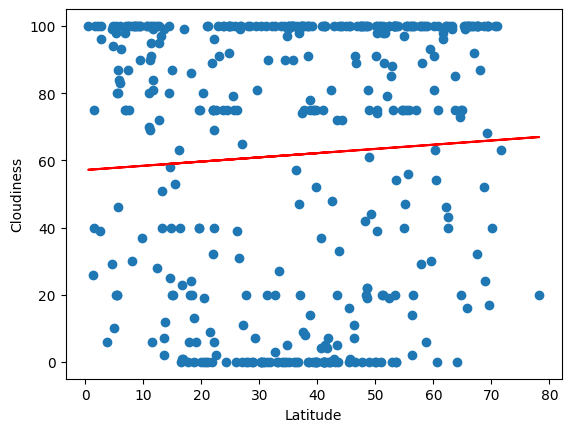

In [32]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show();

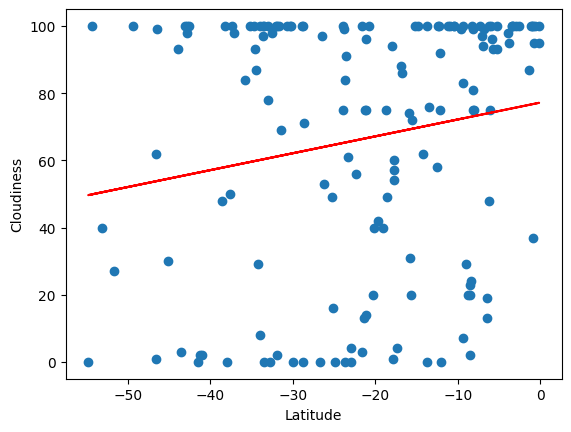

In [35]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show();

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

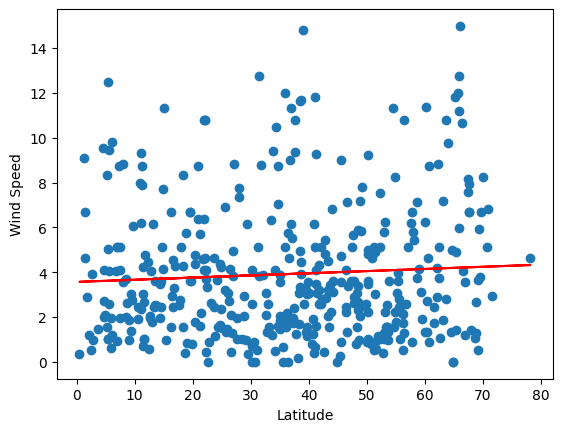

In [37]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show();

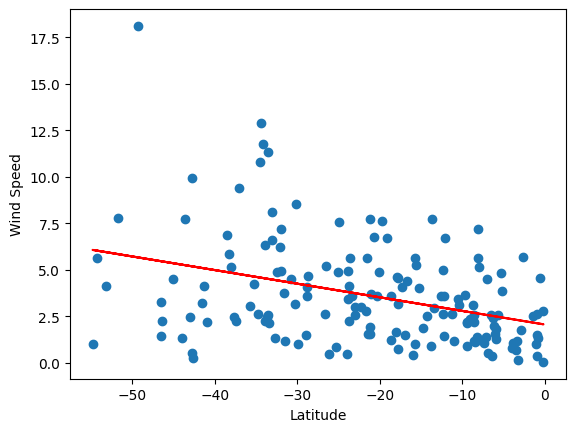

In [36]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show();

**Discussion about the linear relationship:** YOUR RESPONSE HERE